<h4>Pregunta 4 :¿Calcular  cuales son los superheroes mas altos , mas bajos y mas pesados (indicar los 3 primeros)? 
¿Cual es la relacion entre el peso y la altura?<h4>

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../Data/heroes_completo_limpio.csv")
df = df.drop(["Inteligencia", "Fuerza", "Velocidad", "Durabilidad", "Potencia", "Combate", "Genero", "Etnia", "Color_Ojos", "Alias", "Lugar de nacimiento", "Primera aparición", "Editor", "Alineación", "Color_Pelo"], axis=1)
df.head(5)

,ID,Nombre,Altura,Peso,Nombre Completo
0,1,A-Bomb,203 cm,441 kg,Richard Milhouse Jones
1,2,Abe Sapien,191 cm,65 kg,Abraham Sapien
2,3,Abin Sur,185 cm,90 kg,NaN
3,4,Abomination,203 cm,441 kg,Emil Blonsky
4,5,Abraxas,0 cm,0 kg,Abraxas


Limpiar datos de Nans y pasar los datos a Float para poder trabajarlo despúes tenemos que quitar los cm y los kg 🧹

In [4]:

def limpiar_datos(df):
    df = df.copy()

    
    def limpiar_peso(valor):
        v = str(valor).lower().strip()
        v = v.replace("kg", "").replace(",", "").strip()

        try:
            f = float(v)
            if f == 0:      
                return np.nan
            return f
        except:
            return np.nan

    
    def limpiar_altura(valor):
        v = str(valor).lower().strip()
        v = v.replace("cm", "").replace(",", "").strip()

        try:
            f = float(v)
            if f == 0:
                return np.nan
            return f
        except:
            return np.nan

    
    df["Peso"] = df["Peso"].apply(limpiar_peso)
    df["Altura"] = df["Altura"].apply(limpiar_altura)

    return df


In [5]:
df1 = limpiar_datos(df)
df1.head(3)

,ID,Nombre,Altura,Peso,Nombre Completo
0,1,A-Bomb,203.0,441.0,Richard Milhouse Jones
1,2,Abe Sapien,191.0,65.0,Abraham Sapien
2,3,Abin Sur,185.0,90.0,NaN


Función para sacar los máximos y mínimos de Altura y Peso, sacamos los 3 de cada uno 🔝



In [6]:

def top3_superheroes(df):
   
    df_validos = df.dropna(subset=["Altura", "Peso"]).reset_index(drop=True)

    top_altos = df_validos.nlargest(3, "Altura")[["Nombre", "Altura"]]
    top_bajos = df_validos.nsmallest(3, "Altura")[["Nombre", "Altura"]]
    top_pesados = df_validos.nlargest(3, "Peso")[["Nombre", "Peso"]]
    top_ligeros = df_validos.nsmallest(3, "Peso")[["Nombre", "Peso"]]

    return top_altos, top_bajos, top_pesados, top_ligeros


In [15]:
altos, bajos, pesados, ligeros = top3_superheroes(df1)

altos["NombreAltura"] = altos["Nombre"] + " " + altos["Altura"].astype(str) + " cm"
bajos["NombreAltura"] = bajos["Nombre"] + " " + bajos["Altura"].astype(str) + " cm"
pesados["NombrePeso"] = pesados["Nombre"] + " " + pesados["Peso"].astype(str) + " kg"
ligeros["NombrePeso"] = ligeros["Nombre"] + " " + ligeros["Peso"].astype(str) + " kg"

tabla = pd.DataFrame({
    "Más altos": altos["NombreAltura"].tolist(),
    "Más bajos": bajos["NombreAltura"].tolist(),
    "Más pesados": pesados["NombrePeso"].tolist(),
    "Más ligeros": ligeros["NombrePeso"].tolist()
})

print(tabla.to_string(index=False, col_space=25))


                Más altos                 Más bajos               Más pesados               Más ligeros
           MODOK 366.0 cm            Krypto 64.0 cm        Sasquatch 900.0 kg         Jack-Jack 14.0 kg
       Wolfsbane 366.0 cm              Yoda 66.0 cm       Juggernaut 855.0 kg              Yoda 17.0 kg
       Onslaught 305.0 cm         Jack-Jack 71.0 cm         Darkseid 817.0 kg   Howard the Duck 18.0 kg


Hacemos la correlacion de Pearson entre altura y peso para ver cuanto de fuerte es , nos da una correlacion moderada, graficamos para verlo más claro, el resultado nos arroja una correlacion de 0.68, la cual es considerada una correlacion moderada tirando a fuerte. 💪

In [13]:

df_validos = df1.dropna(subset=["Peso", "Altura"])


correlacion = df_validos["Peso"].corr(df_validos["Altura"])
print("Correlación entre peso y altura:", correlacion)


Correlación entre peso y altura: 0.6880633787390174


En la gráfica vemos que la correlacion se vuelve moderada por que hay varios valores muy fuera de rango que rompen la correlación ya que como vemos donde tenemos más datos se concentran entre 1,60m y 2m, pero tenemos algunos datos muy dispersos como vemos en 800kg que rompen esa correlación. 

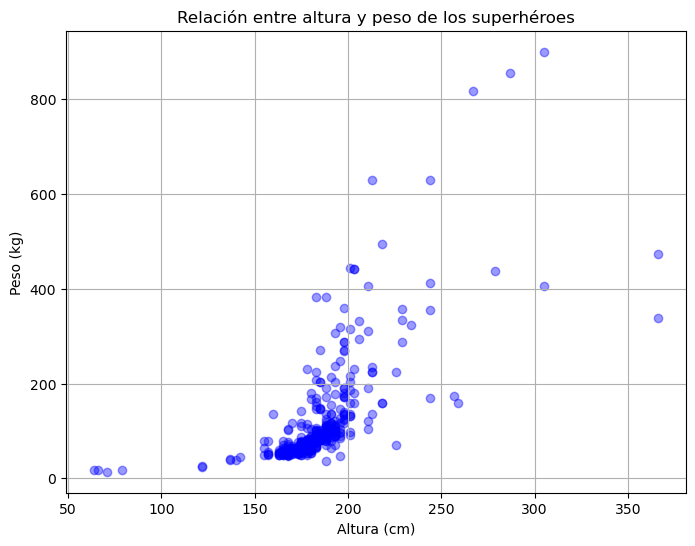

In [10]:

plt.figure(figsize=(8,6))
plt.scatter(df_validos["Altura"], df_validos["Peso"], color="blue", alpha=0.4)
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación entre altura y peso de los superhéroes")
plt.grid(True)
plt.show()


La correlación entre altura y peso es mas fuerte en los datos mas centrales pero se rompen por los outliers que tenemos.